<DIV ALIGN=CENTER>

# Introduction to NLP: Topic Modeling
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

When analyzing large text corpora, trends can appear. These trends can
be repeated use of common phrases or terms that are indicative of common
underlying themes or topics. For example, books on programming might
refer to themes such as human computer interaction, optimization and
performance, or identifying and removing error conditions. Finding these
common topics can be important for a number of reasons. On the one hand,
when they are completely unknown, they can be used to provide new
insight into text documents. On the other hand, when they may be
partially or even completely unknown, computationally identified topics
can provide deeper or more concise insight into the relationship between
documents.

The process of identifying these common topics is known as topic
modeling, which is generally a form of unsupervised learning. As a
specific example, consider the [twenty newsgroup][tw] data that we have
analyzed in scikit learn. While there are twenty different newsgroups,
it turns out they can be grouped into six related categories: computers,
sports, science, politics, religion, and miscellaneous. While we now
these topics ahead of time (from the newsgroup titles), we can apply
topic modeling to these data to identify the common words or phrases
that define these common topics.

In the rest of this notebook, we explore the concept of topic modeling.
First we will use the scikit learn library to perform topic modeling. We
will introduce and use non-negative matrix factorization and Latent
Dirchlet allocation. We apply topic modeling to a text classification
problem, and also explore the terms that make up identified topics.
Finally, we introduce the gensim library, which provides additional
techniques for topic modeling.


-----

[tw]: http://qwone.com/~jason/20Newsgroups/

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
from sklearn.datasets import fetch_20newsgroups

train = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', 
                           subset='train', shuffle=True, random_state=23,
                           remove=('headers', 'footers', 'quotes'))

test = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', 
                          subset='test', shuffle=True, random_state=23,
                          remove=('headers', 'footers', 'quotes'))

In [3]:
# Use TD-IDF on newgroup data.
from sklearn.feature_extraction.text import TfidfVectorizer

cv = TfidfVectorizer(stop_words = 'english',
                     lowercase=True,
                     min_df=2,
                     max_features=5000)
                     
train_data = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

-----

### Non-Negative Matrix Factorization

We can apply [non-negative matrix factorization][wnmf] (NMF) to compute
topics in a corpus. We start with a term-document matrix, which we
factor in to a term-feature and a feature-document matrices. The latter
matrix can be used to identify data clusters (or topics) in the corpus.
We demonstrate the use of NMF to perform topic modeling by using the
scikit learn library's [NMF implementation][sknmf]. 

-----

[wnmf]: https://en.wikipedia.org/wiki/Non-negative_matrix_factorization
[sknmf]: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html

In [4]:
# Compute topics by using NMF
from sklearn.decomposition import NMF

num_topics = 6
nmf = NMF(n_components = num_topics, max_iter = 1000).fit(train_data)

In [5]:
from helper_code import tpterms as tp

nmf_topics = tp.get_topics(cv, nmf)

Topic  0: god jesus bible believe faith christian christ christians people does
Topic  1: thanks windows does know file mail program files advance use
Topic  2: geb edu dsl chastity n3jxp cadre pitt shameful intellect skepticism
Topic  3: drive scsi card disk hard drives controller ide new sale
Topic  4: key chip encryption clipper keys government use escrow law public
Topic  5: don just think people like good time know did right


-----

### Understanding Topic Terms

We can explore the terms that are important for each topic by creating a
DataFrame to map our topic terms to the original twenty newsgroups. We
demonstrate this below by first normalizing the transformed data to have
unit probability. We use these data to create the DataFrame and group
the resulting rows by the associated newsgroup as shown below.

-----

In [6]:
# We transform and normalize the data, 
# by using l1 so document topic probabilty sums to unity.

from sklearn.preprocessing import normalize

td = nmf.transform(train_data)
td_norm = normalize(td, norm='l1', axis=1)

In [7]:
# We use a DataFrame to simplify the collecting of the data for display.

df = pd.DataFrame(td_norm, columns=nmf_topics)
df.fillna(value=0, inplace=True)
df['label'] = pd.Series(train['target'])

In [8]:
# Now group and add human names for the labels
df_lbl = df.groupby('label').mean()
df_lbl['Names'] = pd.Series(train['target_names'], dtype="category")

# Now display the grouped data
df_lbl

,"god, jesus, bible, believe, faith","thanks, windows, does, know, file","geb, edu, dsl, chastity, n3jxp","drive, scsi, card, disk, hard","key, chip, encryption, clipper, keys","don, just, think, people, like",Names
label,,,,,,,
0,0.369120,0.071282,0.017721,0.018260,0.050093,0.444357,alt.atheism
1,0.025108,0.573189,0.020337,0.105202,0.067693,0.177650,comp.graphics
2,0.016642,0.621298,0.020209,0.140804,0.041723,0.115330,comp.os.ms-windows.misc
3,0.022226,0.298463,0.016279,0.464804,0.053582,0.122612,comp.sys.ibm.pc.hardware
4,0.023015,0.260580,0.014806,0.426342,0.063146,0.174048,comp.sys.mac.hardware
5,0.025306,0.677387,0.020587,0.047713,0.090433,0.133516,comp.windows.x
6,0.019817,0.210140,0.033296,0.485059,0.043129,0.194885,misc.forsale
7,0.031582,0.139295,0.020526,0.156492,0.050198,0.544667,rec.autos
8,0.034467,0.139748,0.025001,0.121383,0.037568,0.615077,rec.motorcycles


-----
### Topic-based Classification

If documents are composed of topics, we can leverage defined topics to
classify new documents based on the topics that are assigned to each new
document. In the following code cells, we first train a Naive Bayes
classifier on the topics in the training data sample of the twenty
newsgroup data set. We compute the topics, by using the previously
created NMF model, for the test data and compute classifications from
these topic models. Finally, the resulting classification report and
confusion matrix are shown to demonstrate the quality of this
classification method.

-----

In [9]:
# Build classifier from topics.
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(td, train['target'])

# Apply classifier to blind test data
ts_preds = clf.predict(nmf.transform(test_data))

from sklearn import metrics

print(metrics.classification_report(test['target'], ts_preds,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       319
           comp.graphics       0.00      0.00      0.00       389
 comp.os.ms-windows.misc       0.24      0.21      0.22       394
comp.sys.ibm.pc.hardware       0.27      0.47      0.35       392
   comp.sys.mac.hardware       0.00      0.00      0.00       385
          comp.windows.x       0.26      0.65      0.37       395
            misc.forsale       0.38      0.10      0.16       390
               rec.autos       0.26      0.03      0.05       396
         rec.motorcycles       0.09      0.16      0.12       398
      rec.sport.baseball       0.06      0.01      0.02       397
        rec.sport.hockey       0.13      0.85      0.22       399
               sci.crypt       0.56      0.64      0.60       396
         sci.electronics       0.28      0.15      0.20       393
                 sci.med       0.16      0.05      0.08       396
         

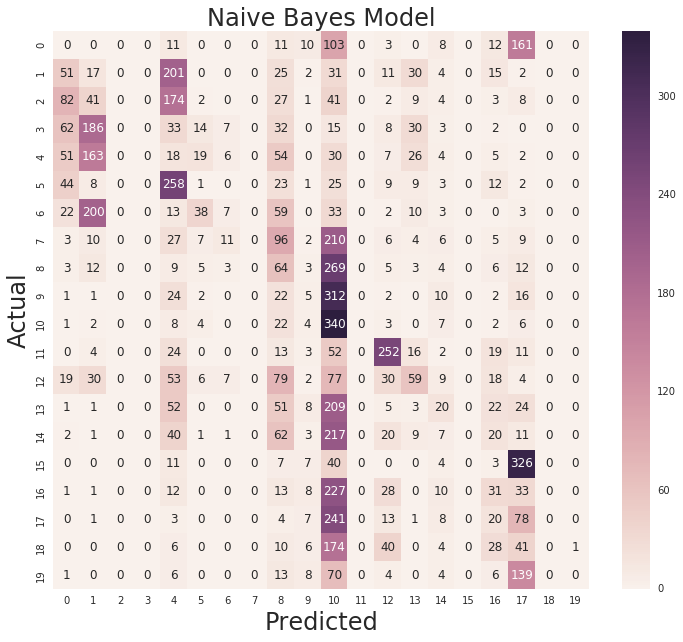

In [10]:
# Create Confusion Plot
fig, ax = plt.subplots(figsize=(12, 10))

from helper_code import mlplots as mp
mp.confusion(test['target'], ts_preds, range(20), 20, 'Naive Bayes Model')

-----
### Student Activity

In the preceding cells, we introduced basic topic modeling by using the
scikit learn library and employed NMF in a text classification pipeline.
Now that you have run the Notebook, why do you think the results from
the topic model-based classification are so poor, especially when
compared to the same algorithm without topic modeling (feel free to
discuss this in the class forum)?

Try making the following changes:

1. Increase the number of topics from six to sixty. Do the results change?
2. Change the classification algorithm to a random forest. Do the results
change?
3. Try changing the TFIDF parameters to use more features and n-grams. Do
the results change?

-----

## Latent Dirichlet allocation

Perhaps the most popular topic modeling algorithm is [Latent Dirichlet
allocation][wlda] or LDA. LDA assumes that documents in a Corpus result
from a mixture of a small number of topics,  and that the words in the
document can be attributed to one of the topics that make up that
document. The scikit learn library has an [LDA implementation][sklda],
which can be easily applied to a data set, as demonstrated below. After
constructing an LDA model, we extract the topics (in this case we are
identifying topics for the newsgroup data set) and display the top terms
in each topic.

-----
[wlda]: https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation
[sklda]: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [11]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=num_topics, max_iter=5,
                                learning_method='online', learning_offset=5.,
                                random_state=23).fit(train_data)

In [12]:
lda_topics = tp.get_topics(cv, lda)

Topic  0: people don just think like god know time say good
Topic  1: 650 da bat ml gary col ho mt pl p2
Topic  2: game team games players year season play hockey player baseball
Topic  3: thanks windows use know does drive like mail edu card
Topic  4: bike oil armenian miles gordon pitt ride surrender banks armenians
Topic  5: bus nasa space orbit launch shuttle ax lunar moon satellite


-----

### Visualizing Topics

We can visualize he important terms in a topic by constructing a
[wordle][ww], which is a word cloud where the size of the word indicates
its relative importance. To do this, we will use the Python [word cloud][pwn]
library as demonstrated in the following code cell, where we display a
word cloud for the first topic and a word cloud for all topics.

-----
[ww]: http://www.wordle.net
[pwn]: http://amueller.github.io/word_cloud/

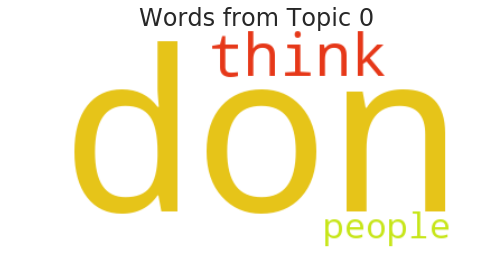

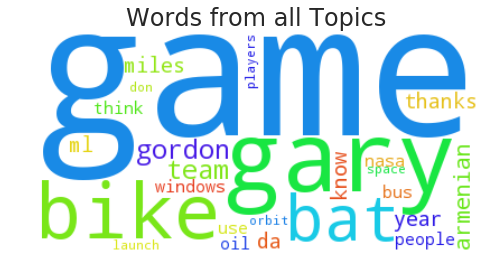

In [13]:
from helper_code import wcviz as wc

wc.make_wc(lda_topics[0].replace(',', ''), 'Words from Topic 0')

text = ', '.join(lda_topics)
wc.make_wc(text.replace(',', ''), 'Words from all Topics')

-----

### Student Activity

In the preceding cells, we introduced Latent Dirichlet allocation. Now
that you have run the Notebook, try to use LDA in the previous text
classification problem. Are the results better or worse? Can you explain
why?

-----

## Gensim

While NLTK is a useful library to learn the basic concepts in text
analysis and natural language processing, there are other libraries that
provide powerful NLP functionality. One of the most important libraries
in this category is the [_gensim_ library][gl], which is an open source,
Python library to create vector-space models for text data that can be
used to create topic models. In the following section, we review how to
use the gensim library to perform basic text analysis, before learning
how to use gensim  to create topic models. 

An important task in gensim is to the creation of the vector space model
for a text document. The indices into the vector space are mapped to the
actual terms (or words) by a dictionary; thus we will need the actual
vector space model and this dictionary to use gensim for topic
modeling. These concepts are demonstrated in the following few code
cells, where we analyze the course description.

-----
[gl]: http://radimrehurek.com/gensim/

In [14]:
# Next section follows gensim tutorial

# As a text example, we use the course description for INFO490  SP16.
info_course = ['Advanced Data Science: This class is an asynchronous, online course.', 
               'This course will introduce advanced data science concepts by building on the foundational concepts presented in INFO 490: Foundations of Data Science.', 
               'Students will first learn how to perform more statistical data exploration and constructing and evaluating statistical models.', 
               'Next, students will learn machine learning techniques including supervised and unsupervised learning, dimensional reduction, and cluster finding.', 
               'An emphasis will be placed on the practical application of these techniques to high-dimensional numerical data, time series data, image data, and text data.', 
               'Finally, students will learn to use relational databases and cloud computing software components such as Hadoop, Spark, and NoSQL data stores.', 
               'Students must have access to a fairly modern computer, ideally that supports hardware virtualization, on which they can install software.', 
               'This class is open to sophomores, juniors, seniors and graduate students in any discipline who have either taken a previous INFO 490 data science course or have received instructor permission.']

# Simple stop words
stop_words = set('for a of the and to in on an'.split())

# Parse text into words, make lowercase and remove stop words
txts = [[word for word in sentance.lower().split() if word not in stop_words]
        for sentance in info_course]

# Keep only those words appearing more than once
# Easy with a Counter, but need a flat list
from collections import Counter
frequency = Counter([word for txt in txts for word in txt])

# Now grab tokens that appear more than once
tokens = [[token for token in txt if frequency[token] > 1]
          for txt in txts]

# Display the tokens
import pprint
pp = pprint.PrettyPrinter(indent=2, depth=2, width=80, compact=True)

pp.pprint(tokens)

[ ['advanced', 'data', 'this', 'class', 'is'],
  [ 'this', 'course', 'will', 'advanced', 'data', 'science', 'concepts',
    'concepts', 'info', 'data'],
  ['students', 'will', 'learn', 'statistical', 'data', 'statistical'],
  ['students', 'will', 'learn', 'techniques'],
  ['will', 'techniques', 'data,', 'data,', 'data,'],
  ['students', 'will', 'learn', 'data'], ['students', 'have'],
  [ 'this', 'class', 'is', 'students', 'have', 'info', 'data', 'science',
    'course', 'have']]


In [15]:
# Compute dictionary mapptin for given text corpus

from gensim import corpora
dict_gensim = corpora.Dictionary(tokens)
print(dict_gensim)

Dictionary(16 unique tokens: ['techniques', 'science', 'students', 'statistical', 'will']...)


In [16]:
# Display mapping between index and word in Bag of Word model.

print(dict_gensim.token2id)

{'techniques': 13, 'science': 8, 'students': 10, 'statistical': 12, 'will': 5, 'info': 9, 'advanced': 3, 'data,': 14, 'course': 6, 'learn': 11, 'this': 4, 'have': 15, 'class': 0, 'is': 1, 'concepts': 7, 'data': 2}


In [17]:
# Display sample text string as a bag of words.

new_txt = 'data science is cool, you should take this course to learn data concepts'
new_vec = dict_gensim.doc2bow(new_txt.lower().split())
pp.pprint(new_vec)

[(1, 1), (2, 2), (4, 1), (6, 1), (7, 1), (8, 1), (11, 1)]


In [18]:
# Display corpus as bag of words.

crps = [dict_gensim.doc2bow(txt) for txt in txts]
print(crps)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1)], [(2, 1), (5, 1), (10, 1), (11, 1), (12, 2)], [(5, 1), (10, 1), (11, 1), (13, 1)], [(5, 1), (13, 1), (14, 3)], [(2, 1), (5, 1), (10, 1), (11, 1)], [(10, 1), (15, 1)], [(0, 1), (1, 1), (2, 1), (4, 1), (6, 1), (8, 1), (9, 1), (10, 1), (15, 2)]]


-----

### Topic Modeling with gensim

We can use the gensim library to perform topic modeling. We first
transform our info text document to a TFIDF model. The gensim library
requires a dictionary to map indices into the TFIDF model to the words,
which we can do with our `dict_gensim` object. In the next few code
cells, we first create our TFIDF document matrix, display the a sample
text string, the bag of words model for this text strings, and the TFIDF
model of this document. Next, we construct an Latent Dirchlet allocation
model of this document using our dictionary mapping object. Finally, we
display the topics, before quantifying the top topic for each sentence
in our original corpus.

-----

In [19]:
from gensim import models

tfidf = models.TfidfModel(crps)

In [20]:
# Print sentance, bago of words model, and TFIDF representation.

print(new_txt)
print(new_vec)

pp.pprint(tfidf[new_vec])

data science is cool, you should take this course to learn data concepts
[(1, 1), (2, 2), (4, 1), (6, 1), (7, 1), (8, 1), (11, 1)]
[ (1, 0.3860184772660643), (2, 0.2617482842884797), (4, 0.2731153103729994),
  (6, 0.3860184772660643), (7, 0.5790277158990964), (8, 0.3860184772660643),
  (11, 0.2731153103729994)]


In [21]:
# Compute LDA model for corpus

crps_tfidf = tfidf[crps]
lda_gs = models.LdaModel(corpus=crps_tfidf, id2word=dict_gensim, num_topics=3, passes=15)

In [22]:
# Display topics as functions over their top terms

lda_gs.print_topics(3)

[(0,
  '0.063*techniques + 0.063*will + 0.063*data, + 0.063*have + 0.063*data + 0.062*students + 0.062*statistical + 0.062*learn + 0.062*course + 0.062*science'),
 (1,
  '0.148*learn + 0.143*have + 0.117*students + 0.102*statistical + 0.092*techniques + 0.087*will + 0.066*data + 0.028*info + 0.028*science + 0.028*course'),
 (2,
  '0.101*data, + 0.091*is + 0.091*class + 0.088*concepts + 0.087*advanced + 0.086*this + 0.070*course + 0.070*science + 0.070*info + 0.060*data')]

In [23]:
# Determine primary topic for each sentance in original text
import operator

for idx, txt in enumerate(lda_gs[crps_tfidf]):
    srt_txt = sorted(txt, key=operator.itemgetter(1))
    print('Sentance {0:1d} has primary topic {1:1d} with probability = {2:4.3f}'\
          .format(idx, srt_txt[-1][0], srt_txt[-1][1]))

Sentance 0 has primary topic 2 with probability = 0.781
Sentance 1 has primary topic 2 with probability = 0.790
Sentance 2 has primary topic 1 with probability = 0.729
Sentance 3 has primary topic 1 with probability = 0.759
Sentance 4 has primary topic 2 with probability = 0.649
Sentance 5 has primary topic 1 with probability = 0.762
Sentance 6 has primary topic 1 with probability = 0.702
Sentance 7 has primary topic 2 with probability = 0.627


In [24]:
ttps = lda_gs.top_topics(corpus=crps_tfidf, num_words=5)
idx = 0

for lst, val in ttps:
    print('Topic {0}'.format(idx))
    print(35*('-'))
    idx += 1
    for i, z in lst:
        print('    {0:20s}: {1:5.4f}'.format(z, i))
    print(35*('-'))

Topic 0
-----------------------------------
    data,               : 0.1008
    is                  : 0.0907
    class               : 0.0907
    concepts            : 0.0879
    advanced            : 0.0873
-----------------------------------
Topic 1
-----------------------------------
    learn               : 0.1475
    have                : 0.1434
    students            : 0.1171
    statistical         : 0.1017
    techniques          : 0.0919
-----------------------------------
Topic 2
-----------------------------------
    techniques          : 0.0635
    will                : 0.0630
    data,               : 0.0629
    have                : 0.0629
    data                : 0.0629
-----------------------------------


-----

### Topic Modeling with gensim

We can use the gensim library to perform topic modeling of the twenty
newsgroup data. We first need to transform a sparse matrix (as provided
by the scikit learn library) into a gensim corpus. We also need to
construct a vocabulary dictionary, which we can do by transforming the
scikit learn `CountVectorizer` vocabulary into a dictionary that maps
between `id` and the `word`. We demonstrate this transformation in the
following code cell for the newsgroup training data.

-----

In [25]:
from gensim import matutils as mat
from gensim import models as md
from gensim.corpora.dictionary import Dictionary

# transform sparse matrix into gensim corpus
td_gensim = mat.Sparse2Corpus(train_data, documents_columns=False)

# Build temporary dictionary from scikit learn vectorizer
# for use with gensim
tmp_dct = dict((idv, word) for word, idv in cv.vocabulary_.items())
dct = Dictionary.from_corpus(td_gensim, id2word=tmp_dct)

-----

### Latent Semantic Analysis

We can use the gensim library to perform [Latent Semantic
Analysis][wlsa] or LSA; in gensim, however, this technique is called
[Latent Semantic Indexing][glsi] (or LSI). LSA assumes that words with
similar meanings will occur in close proximity. By leveraging this
assumption, we can build and process a term document matrix. After
processing, a cosine similarity can be used to identify words that are
similar. This technique is applied in the following code cell, where we
build an LSA model with six topics from the newsgroup text. The topics
are subsequently displayed as functions of the most important terms in
each topic.

-----
[wlsa]: https://en.wikipedia.org/wiki/Latent_semantic_analysis
[glsi]: http://radimrehurek.com/gensim/models/lsimodel.html

In [26]:
# LSI

lsi = md.lsimodel.LsiModel(corpus=td_gensim, id2word=dct, num_topics=6)
lsi.print_topics()

[(0,
  '-0.167*"don" + -0.164*"just" + -0.162*"like" + -0.161*"know" + -0.153*"people" + -0.138*"think" + -0.128*"does" + -0.115*"good" + -0.114*"use" + -0.110*"time"'),
 (1,
  '-0.257*"god" + 0.241*"windows" + 0.226*"thanks" + -0.190*"people" + 0.158*"card" + 0.148*"drive" + 0.124*"dos" + -0.115*"jesus" + 0.114*"mail" + 0.113*"file"'),
 (2,
  '0.484*"god" + 0.179*"jesus" + 0.155*"windows" + 0.144*"does" + 0.134*"thanks" + -0.125*"year" + -0.120*"pitt" + -0.120*"edu" + -0.119*"geb" + -0.118*"dsl"'),
 (3,
  '0.265*"edu" + 0.236*"geb" + 0.234*"dsl" + 0.234*"n3jxp" + 0.234*"chastity" + 0.234*"cadre" + 0.233*"shameful" + 0.233*"pitt" + 0.232*"skepticism" + 0.232*"intellect"'),
 (4,
  '0.312*"key" + -0.245*"drive" + -0.213*"god" + 0.185*"chip" + 0.173*"government" + 0.167*"encryption" + 0.152*"clipper" + -0.140*"game" + 0.139*"use" + 0.130*"keys"')]

-----

### Latent Dirichlet allocation

The gensim library also provides an implementation of the [Latent
Dirichlet allocation][glda] or LDA. We demonstrate the gensim LDA
technique in the following code cell, where we once again create an LDA
model with six topics for the newsgroup text. We subsequently display
the topics as functions of the top words within each topic. Finally, we
display the top five words in each topic, along with their topic
coherence, which is a measure of the words importance to the specific
topic.

-----

[glda]: http://radimrehurek.com/gensim/models/ldamodel.html

In [27]:
# LDA

lda_gs = md.LdaModel(corpus=td_gensim, id2word=dct, num_topics=6, passes=2)
lda_gs.show_topics()

[(0,
  '0.005*game + 0.005*year + 0.005*team + 0.004*games + 0.003*players + 0.003*like + 0.003*season + 0.003*good + 0.003*think + 0.003*just'),
 (1,
  '0.004*car + 0.003*like + 0.003*use + 0.003*don + 0.003*file + 0.003*know + 0.003*window + 0.003*using + 0.003*just + 0.003*time'),
 (2,
  '0.005*key + 0.005*chip + 0.004*use + 0.004*board + 0.004*clipper + 0.003*data + 0.003*just + 0.003*does + 0.003*printer + 0.003*need'),
 (3,
  '0.008*god + 0.006*people + 0.004*don + 0.004*just + 0.004*say + 0.004*think + 0.003*jesus + 0.003*believe + 0.003*israel + 0.003*know'),
 (4,
  '0.004*people + 0.004*just + 0.004*don + 0.004*think + 0.004*good + 0.003*like + 0.003*know + 0.003*really + 0.002*make + 0.002*time'),
 (5,
  '0.010*thanks + 0.009*windows + 0.009*drive + 0.006*know + 0.006*mail + 0.006*card + 0.006*does + 0.005*dos + 0.005*file + 0.005*scsi')]

In [28]:
ttps = lda_gs.top_topics(corpus=td_gensim, num_words=5)

In [29]:
idx = 0

for lst, val in ttps:
    print('Topic {0}'.format(idx))
    print(35*('-'))
    idx += 1
    for i, z in lst:
        print('    {0:20s}: {1:5.4f}'.format(z, i))
    print(35*('-'))

Topic 0
-----------------------------------
    god                 : 0.0076
    people              : 0.0058
    don                 : 0.0043
    just                : 0.0036
    say                 : 0.0036
-----------------------------------
Topic 1
-----------------------------------
    people              : 0.0042
    just                : 0.0040
    don                 : 0.0038
    think               : 0.0036
    good                : 0.0035
-----------------------------------
Topic 2
-----------------------------------
    game                : 0.0050
    year                : 0.0049
    team                : 0.0049
    games               : 0.0037
    players             : 0.0032
-----------------------------------
Topic 3
-----------------------------------
    thanks              : 0.0100
    windows             : 0.0088
    drive               : 0.0087
    know                : 0.0060
    mail                : 0.0058
-----------------------------------
Topic 4
------------

-----

### Student Activity

In the preceding cells, we used the gensim library to perform topic
modeling on the twenty newsgroup data set. Now that you have n the
Notebook, try making the following changes.

1. Increase the number of topics, how do the results change?
2. Can you map the topics to the original newsgroups?

-----